In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

In [2]:
# Lorenz system
def lorenz63(t, X):
    u, v, w = X
    up = -10*(u - v)
    vp = 28*u - v - u*w
    wp = -2.667*w + u*v
    return up, vp, wp

In [3]:
# Simulation params
# max time, number of data points
tmax, n = 100, 1000  

In [4]:
# PyTorch model
# Lags at 1-2-3-4-5 as feature
data_config = DataConfig(
    target=["x", "y", "z"],
    continuous_cols=['x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3',
       'z_3', 'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5'],
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=64,
    max_epochs=100,
)

optimizer_config = OptimizerConfig()

# Three layer MLP with LeakyReLU activation functions
model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="32-16-16",
    activation="LeakyReLU",
    learning_rate=1e-3,
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

2023-04-16 13:26:24,209 - {pytorch_tabular.tabular_model:102} - INFO - Experiment Tracking is turned off


Global seed set to 42
2023-04-16 13:26:25,944 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-04-16 13:26:25,945 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for regression task
2023-04-16 13:26:25,959 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-04-16 13:26:26,003 - {pytorch_tabular.tabular_model:264} - INFO - Preparing the Trainer
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-04-16 13:26:26,155 - {pytorch_tabular.tabular_model:558} - INFO - Auto LR Find Started
c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 w

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_0635ff36-bd5c-4e57-90f6-c221ae6dff70.ckpt
Restored all states from the checkpoint file at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_0635ff36-bd5c-4e57-90f6-c221ae6dff70.ckpt
2023-04-16 13:26:27,245 - {pytorch_tabular.tabular_model:560} - INFO - Suggested LR: 0.04365158322401657. For plot and detailed analysis, use `find_learning_rate` method.
2023-04-16 13:26:27,247 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  1.3 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     30 │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 1.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-04-16 13:26:31,861 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-04-16 13:26:31,862 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     4.723622798919678     │
│        test_loss_0        │    0.5383831858634949     │
│        test_loss_1        │    1.4971349239349365     │
│        test_loss_2        │    2.6881046295166016     │
│  test_mean_squared_error  │     4.723622798919678     │
│ test_mean_squared_error_0 │    0.5383831858634949     │
│ test_mean_squared_error_1 │    1.4971349239349365     │
│ test_mean_squared_error_2 │    2.6881046295166016     │
└───────────────────────────┴───────────────────────────┘

c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Output()

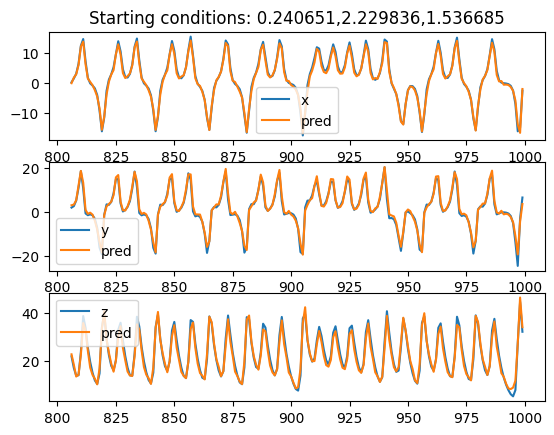

Global seed set to 42
2023-04-16 13:26:32,527 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-04-16 13:26:32,527 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for regression task
2023-04-16 13:26:32,537 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-04-16 13:26:32,675 - {pytorch_tabular.tabular_model:264} - INFO - Preparing the Trainer
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-04-16 13:26:32,711 - {pytorch_tabular.tabular_model:558} - INFO - Auto LR Find Started
c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:604: UserWarning: Checkpoint directory C:\Users\murat\Desktop\projects\pytorch-examples\saved_models exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is n

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_fc1c584e-7303-4d98-80c4-ae18b39c382c.ckpt
Restored all states from the checkpoint file at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_fc1c584e-7303-4d98-80c4-ae18b39c382c.ckpt
2023-04-16 13:26:33,483 - {pytorch_tabular.tabular_model:560} - INFO - Suggested LR: 0.04365158322401657. For plot and detailed analysis, use `find_learning_rate` method.
2023-04-16 13:26:33,484 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  1.3 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     30 │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 1.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-04-16 13:26:35,806 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-04-16 13:26:35,807 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     8.563254356384277     │
│        test_loss_0        │    1.4626498222351074     │
│        test_loss_1        │     4.498520851135254     │
│        test_loss_2        │     2.602083444595337     │
│  test_mean_squared_error  │     8.563254356384277     │
│ test_mean_squared_error_0 │    1.4626498222351074     │
│ test_mean_squared_error_1 │     4.498520851135254     │
│ test_mean_squared_error_2 │     2.602083444595337     │
└───────────────────────────┴───────────────────────────┘

c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Output()

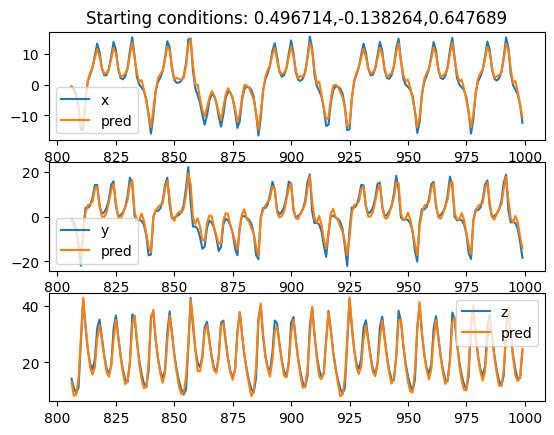

Global seed set to 42
2023-04-16 13:26:36,372 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-04-16 13:26:36,373 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for regression task
2023-04-16 13:26:36,383 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-04-16 13:26:36,397 - {pytorch_tabular.tabular_model:264} - INFO - Preparing the Trainer
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-04-16 13:26:36,431 - {pytorch_tabular.tabular_model:558} - INFO - Auto LR Find Started
c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:604: UserWarning: Checkpoint directory C:\Users\murat\Desktop\projects\pytorch-examples\saved_models exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is n

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_f6844681-8c07-4117-9979-1162f3c40594.ckpt
Restored all states from the checkpoint file at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_f6844681-8c07-4117-9979-1162f3c40594.ckpt
2023-04-16 13:26:37,171 - {pytorch_tabular.tabular_model:560} - INFO - Suggested LR: 0.04365158322401657. For plot and detailed analysis, use `find_learning_rate` method.
2023-04-16 13:26:37,171 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  1.3 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     30 │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 1.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-04-16 13:26:39,374 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-04-16 13:26:39,374 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     8.563254356384277     │
│        test_loss_0        │    1.4626498222351074     │
│        test_loss_1        │     4.498520851135254     │
│        test_loss_2        │     2.602083444595337     │
│  test_mean_squared_error  │     8.563254356384277     │
│ test_mean_squared_error_0 │    1.4626498222351074     │
│ test_mean_squared_error_1 │     4.498520851135254     │
│ test_mean_squared_error_2 │     2.602083444595337     │
└───────────────────────────┴───────────────────────────┘

c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Output()

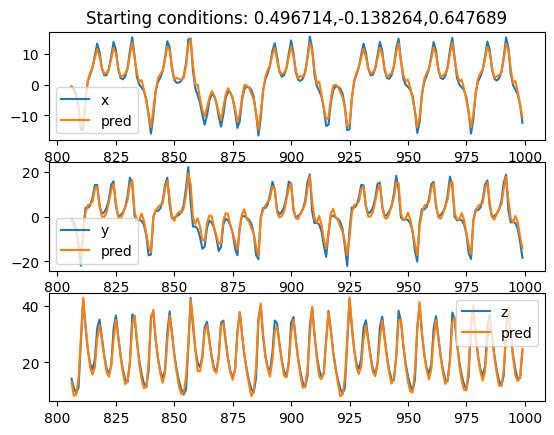

Global seed set to 42
2023-04-16 13:26:39,857 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-04-16 13:26:39,858 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for regression task
2023-04-16 13:26:39,867 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-04-16 13:26:39,882 - {pytorch_tabular.tabular_model:264} - INFO - Preparing the Trainer
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-04-16 13:26:39,919 - {pytorch_tabular.tabular_model:558} - INFO - Auto LR Find Started
c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:604: UserWarning: Checkpoint directory C:\Users\murat\Desktop\projects\pytorch-examples\saved_models exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is n

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_f59bdd92-a024-4b5e-9cfa-fee55dcc1704.ckpt
Restored all states from the checkpoint file at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_f59bdd92-a024-4b5e-9cfa-fee55dcc1704.ckpt
2023-04-16 13:26:40,642 - {pytorch_tabular.tabular_model:560} - INFO - Suggested LR: 0.04365158322401657. For plot and detailed analysis, use `find_learning_rate` method.
2023-04-16 13:26:40,642 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  1.3 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     30 │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 1.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-04-16 13:26:42,932 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-04-16 13:26:42,933 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     8.563254356384277     │
│        test_loss_0        │    1.4626498222351074     │
│        test_loss_1        │     4.498520851135254     │
│        test_loss_2        │     2.602083444595337     │
│  test_mean_squared_error  │     8.563254356384277     │
│ test_mean_squared_error_0 │    1.4626498222351074     │
│ test_mean_squared_error_1 │     4.498520851135254     │
│ test_mean_squared_error_2 │     2.602083444595337     │
└───────────────────────────┴───────────────────────────┘

c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Output()

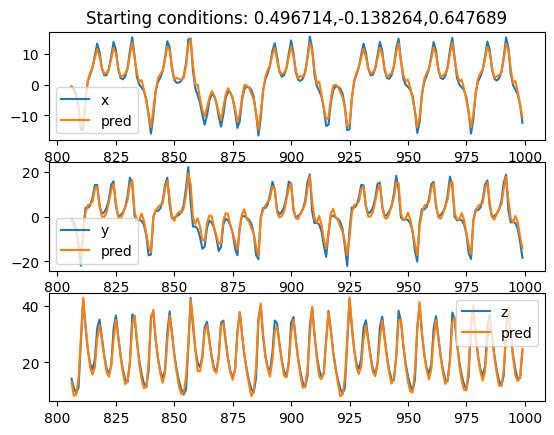

Global seed set to 42
2023-04-16 13:26:43,477 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-04-16 13:26:43,479 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for regression task
2023-04-16 13:26:43,487 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-04-16 13:26:43,501 - {pytorch_tabular.tabular_model:264} - INFO - Preparing the Trainer
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-04-16 13:26:43,538 - {pytorch_tabular.tabular_model:558} - INFO - Auto LR Find Started
c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:604: UserWarning: Checkpoint directory C:\Users\murat\Desktop\projects\pytorch-examples\saved_models exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is n

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_6aa35650-bb20-4b6d-abfc-c6e251015044.ckpt
Restored all states from the checkpoint file at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_6aa35650-bb20-4b6d-abfc-c6e251015044.ckpt
2023-04-16 13:26:44,279 - {pytorch_tabular.tabular_model:560} - INFO - Suggested LR: 0.04365158322401657. For plot and detailed analysis, use `find_learning_rate` method.
2023-04-16 13:26:44,280 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  1.3 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     30 │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 1.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-04-16 13:26:46,430 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-04-16 13:26:46,431 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     8.563254356384277     │
│        test_loss_0        │    1.4626498222351074     │
│        test_loss_1        │     4.498520851135254     │
│        test_loss_2        │     2.602083444595337     │
│  test_mean_squared_error  │     8.563254356384277     │
│ test_mean_squared_error_0 │    1.4626498222351074     │
│ test_mean_squared_error_1 │     4.498520851135254     │
│ test_mean_squared_error_2 │     2.602083444595337     │
└───────────────────────────┴───────────────────────────┘

c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Output()

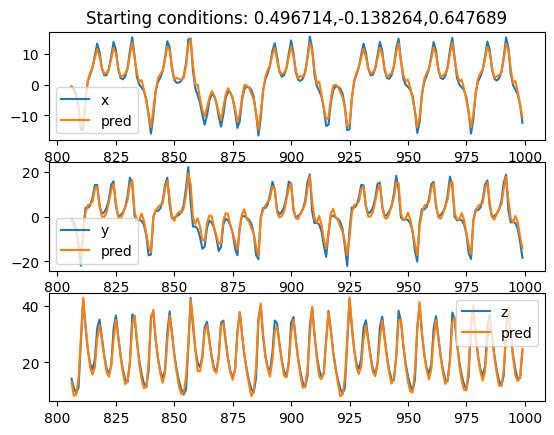

Global seed set to 42
2023-04-16 13:26:46,963 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-04-16 13:26:46,964 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for regression task
2023-04-16 13:26:46,973 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-04-16 13:26:46,988 - {pytorch_tabular.tabular_model:264} - INFO - Preparing the Trainer
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-04-16 13:26:47,024 - {pytorch_tabular.tabular_model:558} - INFO - Auto LR Find Started
c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:604: UserWarning: Checkpoint directory C:\Users\murat\Desktop\projects\pytorch-examples\saved_models exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is n

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_049d19c1-b30d-4243-8657-0844a2d319e7.ckpt
Restored all states from the checkpoint file at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_049d19c1-b30d-4243-8657-0844a2d319e7.ckpt
2023-04-16 13:26:47,746 - {pytorch_tabular.tabular_model:560} - INFO - Suggested LR: 0.04365158322401657. For plot and detailed analysis, use `find_learning_rate` method.
2023-04-16 13:26:47,747 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  1.3 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     30 │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 1.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-04-16 13:26:49,612 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-04-16 13:26:49,613 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     8.563254356384277     │
│        test_loss_0        │    1.4626498222351074     │
│        test_loss_1        │     4.498520851135254     │
│        test_loss_2        │     2.602083444595337     │
│  test_mean_squared_error  │     8.563254356384277     │
│ test_mean_squared_error_0 │    1.4626498222351074     │
│ test_mean_squared_error_1 │     4.498520851135254     │
│ test_mean_squared_error_2 │     2.602083444595337     │
└───────────────────────────┴───────────────────────────┘

c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Output()

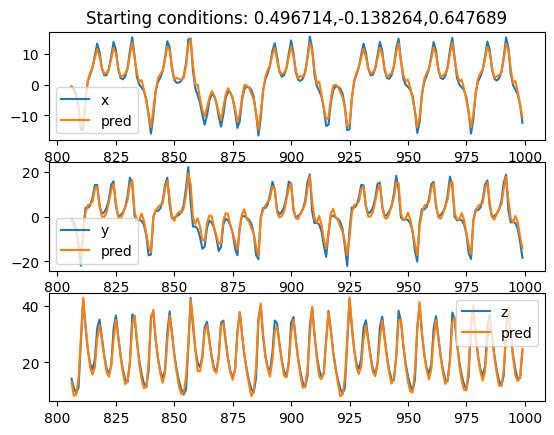

Global seed set to 42
2023-04-16 13:26:50,116 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-04-16 13:26:50,116 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for regression task
2023-04-16 13:26:50,124 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-04-16 13:26:50,139 - {pytorch_tabular.tabular_model:264} - INFO - Preparing the Trainer
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-04-16 13:26:50,184 - {pytorch_tabular.tabular_model:558} - INFO - Auto LR Find Started
c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:604: UserWarning: Checkpoint directory C:\Users\murat\Desktop\projects\pytorch-examples\saved_models exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is n

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_469bee82-e031-4676-9a17-f074615f50bb.ckpt
Restored all states from the checkpoint file at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_469bee82-e031-4676-9a17-f074615f50bb.ckpt
2023-04-16 13:26:50,923 - {pytorch_tabular.tabular_model:560} - INFO - Suggested LR: 0.04365158322401657. For plot and detailed analysis, use `find_learning_rate` method.
2023-04-16 13:26:50,925 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  1.3 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     30 │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 1.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-04-16 13:26:52,926 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-04-16 13:26:52,927 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     8.563254356384277     │
│        test_loss_0        │    1.4626498222351074     │
│        test_loss_1        │     4.498520851135254     │
│        test_loss_2        │     2.602083444595337     │
│  test_mean_squared_error  │     8.563254356384277     │
│ test_mean_squared_error_0 │    1.4626498222351074     │
│ test_mean_squared_error_1 │     4.498520851135254     │
│ test_mean_squared_error_2 │     2.602083444595337     │
└───────────────────────────┴───────────────────────────┘

c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Output()

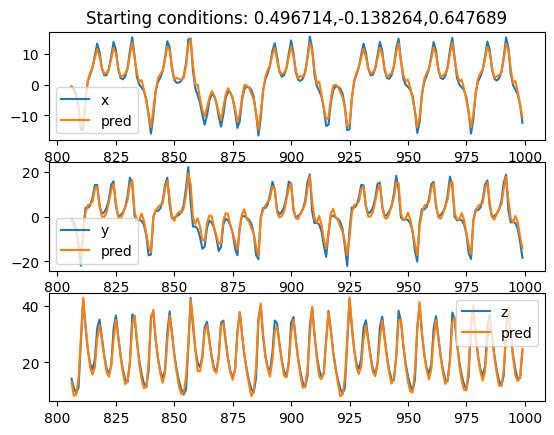

Global seed set to 42
2023-04-16 13:26:53,421 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-04-16 13:26:53,422 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for regression task
2023-04-16 13:26:53,431 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-04-16 13:26:53,444 - {pytorch_tabular.tabular_model:264} - INFO - Preparing the Trainer
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-04-16 13:26:53,487 - {pytorch_tabular.tabular_model:558} - INFO - Auto LR Find Started
c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:604: UserWarning: Checkpoint directory C:\Users\murat\Desktop\projects\pytorch-examples\saved_models exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is n

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_e2463a53-4690-4160-b2b6-34e77e2a063e.ckpt
Restored all states from the checkpoint file at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_e2463a53-4690-4160-b2b6-34e77e2a063e.ckpt
2023-04-16 13:26:54,220 - {pytorch_tabular.tabular_model:560} - INFO - Suggested LR: 0.04365158322401657. For plot and detailed analysis, use `find_learning_rate` method.
2023-04-16 13:26:54,221 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  1.3 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     30 │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 1.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-04-16 13:26:56,118 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-04-16 13:26:56,118 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     8.563254356384277     │
│        test_loss_0        │    1.4626498222351074     │
│        test_loss_1        │     4.498520851135254     │
│        test_loss_2        │     2.602083444595337     │
│  test_mean_squared_error  │     8.563254356384277     │
│ test_mean_squared_error_0 │    1.4626498222351074     │
│ test_mean_squared_error_1 │     4.498520851135254     │
│ test_mean_squared_error_2 │     2.602083444595337     │
└───────────────────────────┴───────────────────────────┘

c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Output()

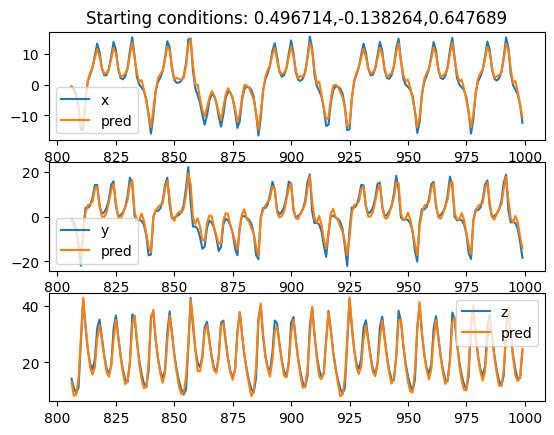

Global seed set to 42
2023-04-16 13:26:56,871 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-04-16 13:26:56,872 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for regression task
2023-04-16 13:26:56,882 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-04-16 13:26:56,897 - {pytorch_tabular.tabular_model:264} - INFO - Preparing the Trainer
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-04-16 13:26:56,937 - {pytorch_tabular.tabular_model:558} - INFO - Auto LR Find Started
c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:604: UserWarning: Checkpoint directory C:\Users\murat\Desktop\projects\pytorch-examples\saved_models exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is n

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_f4f2de85-725d-4b86-a357-415115eb6a00.ckpt
Restored all states from the checkpoint file at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_f4f2de85-725d-4b86-a357-415115eb6a00.ckpt
2023-04-16 13:26:57,777 - {pytorch_tabular.tabular_model:560} - INFO - Suggested LR: 0.04365158322401657. For plot and detailed analysis, use `find_learning_rate` method.
2023-04-16 13:26:57,778 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  1.3 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     30 │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 1.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-04-16 13:26:59,644 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-04-16 13:26:59,645 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     8.563254356384277     │
│        test_loss_0        │    1.4626498222351074     │
│        test_loss_1        │     4.498520851135254     │
│        test_loss_2        │     2.602083444595337     │
│  test_mean_squared_error  │     8.563254356384277     │
│ test_mean_squared_error_0 │    1.4626498222351074     │
│ test_mean_squared_error_1 │     4.498520851135254     │
│ test_mean_squared_error_2 │     2.602083444595337     │
└───────────────────────────┴───────────────────────────┘

c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Output()

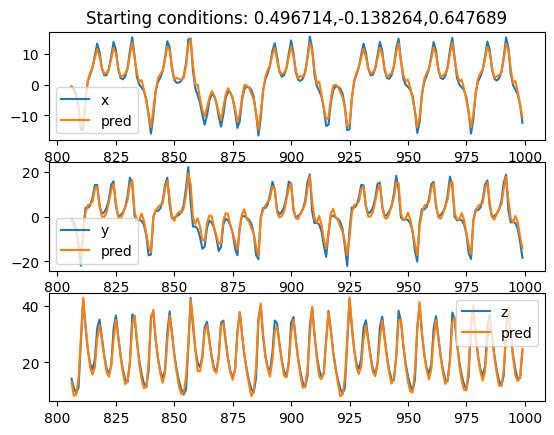

Global seed set to 42
2023-04-16 13:27:00,144 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-04-16 13:27:00,145 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for regression task
2023-04-16 13:27:00,155 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-04-16 13:27:00,173 - {pytorch_tabular.tabular_model:264} - INFO - Preparing the Trainer
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-04-16 13:27:00,207 - {pytorch_tabular.tabular_model:558} - INFO - Auto LR Find Started
c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:604: UserWarning: Checkpoint directory C:\Users\murat\Desktop\projects\pytorch-examples\saved_models exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is n

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.04365158322401657
Restoring states from the checkpoint path at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_03eb4170-b643-4640-916b-56df3fe0c63b.ckpt
Restored all states from the checkpoint file at c:\Users\murat\Desktop\projects\pytorch-examples\.lr_find_03eb4170-b643-4640-916b-56df3fe0c63b.ckpt
2023-04-16 13:27:00,989 - {pytorch_tabular.tabular_model:560} - INFO - Suggested LR: 0.04365158322401657. For plot and detailed analysis, use `find_learning_rate` method.
2023-04-16 13:27:00,990 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  1.3 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     30 │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 1.4 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-04-16 13:27:02,949 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-04-16 13:27:02,949 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     8.563254356384277     │
│        test_loss_0        │    1.4626498222351074     │
│        test_loss_1        │     4.498520851135254     │
│        test_loss_2        │     2.602083444595337     │
│  test_mean_squared_error  │     8.563254356384277     │
│ test_mean_squared_error_0 │    1.4626498222351074     │
│ test_mean_squared_error_1 │     4.498520851135254     │
│ test_mean_squared_error_2 │     2.602083444595337     │
└───────────────────────────┴───────────────────────────┘

c:\Users\murat\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Output()

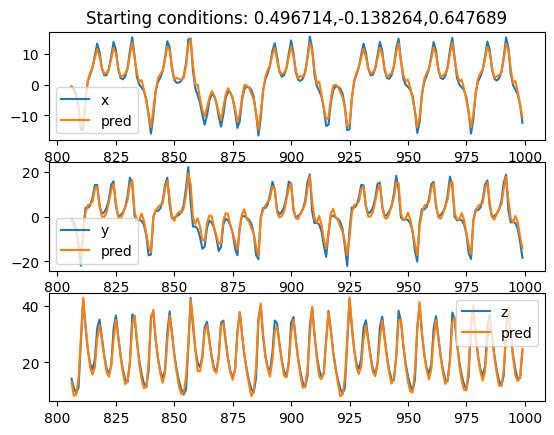

In [5]:
# Train and predict for 10 different starting conditions
for _ in range(10):
    # Generate random starting point
    u0 = np.random.randn()
    v0 = np.random.randn()
    w0 = np.random.randn()

    # Solve system
    soln = solve_ivp(lorenz63, (0, tmax), (u0, v0, w0), dense_output=True)
    t = np.linspace(0, tmax, n)
    x, y, z = soln.sol(t)
    
    # Prepare dataset
    df = pd.DataFrame(np.concatenate([x.reshape(-1, 1), y.reshape(-1, 1), z.reshape(-1, 1)], axis=1), columns=["x", "y", "z"])
    for i in range(5):
        df[f"x_{i+1}"] = df.x.shift(i+1)
        df[f"y_{i+1}"] = df.y.shift(i+1)
        df[f"z_{i+1}"] = df.z.shift(i+1)
    df.dropna(inplace=True)

    # Split data as train-valid-test
    traindata, validdata, testdata = df.iloc[0:500,:], df.iloc[501:800,:], df.iloc[801:,:]
    
    # Fit - predict
    tabular_model.fit(train=traindata, validation=validdata)
    result = tabular_model.evaluate(testdata)
    pred_df = tabular_model.predict(testdata)
    
    # Plot
    fig, ax = plt.subplots(3, 1)
    ax[0].set_title(f"Starting conditions: {np.round(u0, 6)},{np.round(v0, 6)},{np.round(w0, 6)}")
    ax[0].plot(pred_df['x'], label="x")
    ax[0].plot(pred_df['x_prediction'], label="pred")
    ax[0].legend()
    ax[1].plot(pred_df['y'], label="y")
    ax[1].plot(pred_df['y_prediction'], label="pred")
    ax[1].legend()
    ax[2].plot(pred_df['z'], label="z")
    ax[2].plot(pred_df['z_prediction'], label="pred")
    ax[2].legend()
    plt.show()

In [9]:
tabular_model.save_model("models/lorenz63")